# The Sparks Foundation Data Science Internship
### TASK 1 : Prediction using Supervised Machine Learning
##### To predict the percentage of marks of the students based on the number of hours they studied.

## Author - Niharika

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score

#### Defining the Dataframe

In [2]:
df = pd.read_csv('Study_hours.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### EDA-Exploratory Data Analysis

In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### Here we can see there is not any null values .So we can proceed further.

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


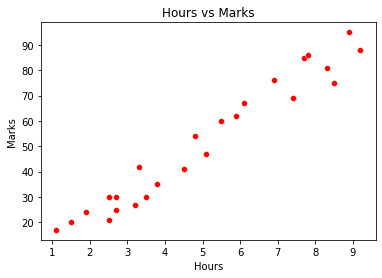

In [9]:
sns.scatterplot(x=df.Hours,y=df.Scores,color='r')
plt.title('Hours vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Building the Model

In [10]:
x=df.Hours.values.reshape(-1,1)
y=df.Scores.values.reshape(-1,1)

##### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

### Training the Model

In [11]:
#splitting the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [12]:
#fitting the data into model.
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Testing the Model

In [13]:
x_test

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5],
       [7.4],
       [1.1],
       [5.5]])

In [14]:
#predicting the scores
y_pred = lr.predict(x_test)
y_pred

array([[16.3158208 ],
       [52.56027486],
       [34.43804783],
       [33.43125744],
       [46.51953252],
       [75.71645385],
       [12.28865924],
       [56.58743642]])

In [15]:
# Comparing Actual vs Predicted
compare_scores =pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : y_pred.reshape(1,-1)[0]})  
compare_scores

,Hours,Actual Score,Predicted Score
0,1.5,20,16.315821
1,5.1,47,52.560275
2,3.3,42,34.438048
3,3.2,27,33.431257
4,4.5,41,46.519533
5,7.4,69,75.716454
6,1.1,17,12.288659
7,5.5,60,56.587436


### Visual comparison between Predicted Marks and Actual Marks

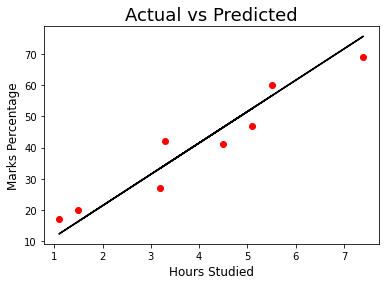

In [16]:
plt.scatter(x=x_test, y=y_test, color='red')
plt.plot(x_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=18)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


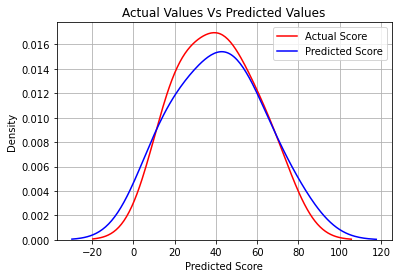

In [17]:
ax1 = sns.distplot(compare_scores["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(compare_scores["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.title("Actual Values Vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

### Evaluating the Model

In [18]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred)) ##error of model
print('Accuracy:',r2_score(y_test,y_pred))  ##accuracy of model

Mean Absolute Error: 5.4496942971539895
Accuracy: 0.8944542088325094


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
hours = 9.25
pred = lr.predict([[9.25]])
print("No of Hours = ",hours)
print("The predicted score = ",pred[0])

No of Hours =  9.25
The predicted score =  [94.34207607]


##### According to the linear regression model if a student studies for 9.25 hours a day he/she is likely to score 94.342 marks.